In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import re
import matplotlib.lines as mlines
from matplotlib.patches import Patch

# YKD LAKE Model Benchmarking
This script is used to compare one or multiple LAKE model runs with obsereved water temperatures and concentrations of CO2 and CH4. The data preparation relies on LAKE model output in the second format option (output files ending in '1f2.dat').

In [2]:
datafile_names = {'layers': 'layers  1  1.dat',
                  'water_temp': 'water_temp  1  1f2.dat',
                  'co2_water': 'co2_water  1  1f2.dat',
                  'ch4_water': 'methane_water  1  1f2.dat'}

In [3]:
burned_co2_paths = ['YKD-SA/data/' + filename for filename in os.listdir('YKD-SA/data/') if 'co2' in  filename]
burned_ch4_paths = ['YKD-SA/data/' + filename for filename in os.listdir('YKD-SA/data/') if 'methane' in  filename]
burned_temp_paths = ['YKD-SA/data/' + filename for filename in os.listdir('YKD-SA/data/') if 'temp' in  filename]

In [4]:
path_to_unburned_co2_obs = '../data/raw/UB_Pond_CO2_062622-072822.csv'
path_to_burned_co2_obs = '../data/raw/Burned_Pond_CO2_062422-081622.csv'
path_to_ch4_obs = '../data/raw/Pond_Env_For_Elchin.xlsx'

In [5]:
unburned_co2_obs = pd.read_csv(path_to_unburned_co2_obs, parse_dates=['Date'])
min_ub_co2_date = unburned_co2_obs['Date'].min()
max_ub_co2_date = unburned_co2_obs['Date'].max()
burned_co2_obs = pd.read_csv(path_to_burned_co2_obs, parse_dates=['Date', 'TIMESTAMP'])
min_bu_co2_date = burned_co2_obs['Date'].min()
max_bu_co2_date = burned_co2_obs['Date'].max()

In [6]:
ch4_obs = pd.read_excel(path_to_ch4_obs, parse_dates=['date'])
min_ch4_date = ch4_obs['date'].min()
max_ch4_date = ch4_obs['date'].max()

In [7]:
#get temp, co2, and ch4 df for burned runs
burned_ch4_df = []
for out_path in burned_ch4_paths:

    #ch4 concentration
    ch4=pd.read_csv(out_path, delimiter=r"\s+", skiprows=6, index_col=None, header=None)
    ch4 = ch4.drop(columns=[5, 7,9,11,13,15,17])
    ch4.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"]
    ch4['datetime'] = pd.to_datetime(dict(year=ch4['Year'], month=ch4['Month'], day=ch4['Day'], hour=ch4['Hour']))
    ch4 = ch4.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])
    

    ch4 = ch4.replace(-999, np.nan)
    ch4 = pd.melt(ch4, id_vars=['datetime'], value_vars=["0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"], var_name='depth', value_name='ch4_water')
    ch4['run_name'] = re.search(r'\((.*?)\)', out_path).group(1) if (re.search(r'\((.*?)\)', out_path)) else '0'
    burned_ch4_df.append(ch4)

burned_ch4_df = pd.concat(burned_ch4_df)

In [8]:
#get temp, co2, and ch4 df for burned runs
burned_co2_df = []
for out_path in burned_co2_paths:

    #ch4 concentration
    co2=pd.read_csv(out_path, delimiter=r"\s+", skiprows=6, index_col=None, header=None)
    co2 = co2.drop(columns=[5, 7,9,11,13,15,17])
    co2.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"]
    co2['datetime'] = pd.to_datetime(dict(year=co2['Year'], month=co2['Month'], day=co2['Day'], hour=co2['Hour']))
    co2 = co2.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])
    

    co2 = co2.replace(-999, np.nan)
    co2 = pd.melt(co2, id_vars=['datetime'], value_vars=["0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"], var_name='depth', value_name='co2_water')
    co2['run_name'] = re.search(r'\((.*?)\)', out_path).group(1) if (re.search(r'\((.*?)\)', out_path)) else '0'
    burned_co2_df.append(co2)

burned_co2_df = pd.concat(burned_co2_df)

In [9]:
#get temp, co2, and ch4 df for burned runs
burned_temp_df = []
for out_path in burned_temp_paths:

    #ch4 concentration
    temp=pd.read_csv(out_path, delimiter=r"\s+", skiprows=6, index_col=None, header=None)
    temp = temp.drop(columns=[5, 7,9,11,13,15,17])
    temp.columns = ["Year", "Month", "Day", "Hour", "Starting time", "0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"]
    temp['datetime'] = pd.to_datetime(dict(year=temp['Year'], month=temp['Month'], day=temp['Day'], hour=temp['Hour']))
    temp = temp.drop(columns=["Year", "Month", "Day", "Hour", "Starting time"])
    temp['run_name'] = re.search(r'\((.*?)\)', out_path).group(1) if (re.search(r'\((.*?)\)', out_path)) else '0'

    temp = temp.replace(-999, np.nan)
    temp = pd.melt(temp, id_vars=['datetime'], value_vars=["0.00", "0.25", "0.50", "0.75", "1.00", "1.25", "1.50"], var_name='depth', value_name='temp_water')
    temp['run_name'] = re.search(r'\((.*?)\)', out_path).group(1) if (re.search(r'\((.*?)\)', out_path)) else '0'
    burned_temp_df.append(temp)

burned_temp_df = pd.concat(burned_temp_df)

In [10]:
burned_ch4_df.head()

,datetime,depth,ch4_water,run_name
0,2022-01-05 16:00:00,0.00,261884693.7,23
1,2022-01-09 20:00:00,0.00,402350053.0,23
2,2022-01-14 00:00:00,0.00,432484253.2,23
3,2022-01-18 04:00:00,0.00,439157803.2,23
4,2022-01-22 08:00:00,0.00,440734085.2,23


In [11]:
burned_co2_obs

,TIMESTAMP,Date,Time,Battery_Voltage_Avg,PTemp_Avg_degC,CO2_High_ppm,CO2_High_RA_ppm,WaterTemp_degC,PAR
0,2022-06-24 16:00:00,2022-06-24,16:00,12.79,24.95,3561.6850,2212.7760,NaN,NaN
1,2022-06-24 16:30:00,2022-06-24,16:30,12.79,23.15,434.1206,431.0415,NaN,NaN
2,2022-06-24 17:00:00,2022-06-24,17:00,12.79,22.89,957.1981,680.6409,NaN,NaN
3,2022-06-24 17:30:00,2022-06-24,17:30,12.79,22.53,1195.4240,1132.5020,NaN,NaN
4,2022-06-24 18:00:00,2022-06-24,18:00,12.78,21.08,1242.6810,1217.6830,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2518,2022-08-16 03:00:00,2022-08-16,3:00,11.49,8.86,2071.7480,1327.8190,11.528,0.0
2519,2022-08-16 03:30:00,2022-08-16,3:30,11.48,8.94,2102.1410,1390.9060,11.431,0.0
2520,2022-08-16 04:00:00,2022-08-16,4:00,11.48,8.97,2135.9170,1455.1710,11.431,0.0
2521,2022-08-16 04:30:00,2022-08-16,4:30,11.49,8.95,2181.8740,1521.2160,11.431,0.0


# Plotting
### Burned Plots

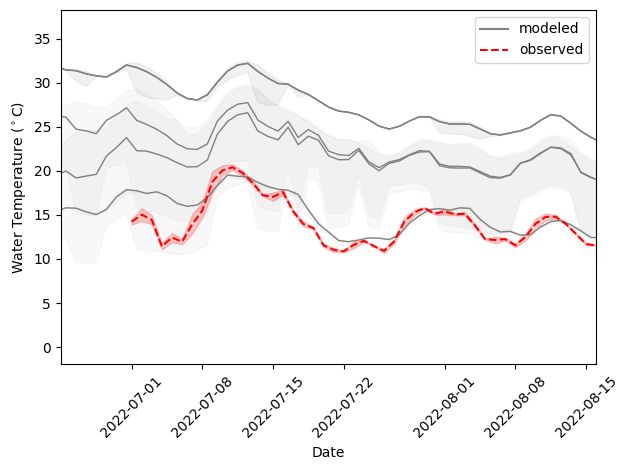

In [12]:
fig, ax=plt.subplots()
burned_temp_df=burned_temp_df.reset_index(drop=True)
blue = sns.color_palette()[0]
sns.lineplot(data= burned_temp_df, x='datetime', y='temp_water', legend=False, hue = 'run_name', errorbar=lambda x: (x.min(), x.max()), 
             palette = ['grey']*len(burned_temp_df['run_name'].unique()), linewidth=1, err_kws = {'alpha': 0.05}, label = 'modeled')
#sns.scatterplot(data= burned_temp_df, x='datetime', y='temp_water', legend=False, hue = 'run_name', 
#             palette = ['black']*len(burned_temp_df['run_name'].unique()), s=1)
#sns.lineplot(data= burned_temp_df, x='datetime', y='temp_water', legend=False, errorbar=lambda x: (x.min(), x.max()))
sns.lineplot(data=burned_co2_obs, x='Date', y='WaterTemp_degC', color='red', linestyle='--')
plt.xlim(min_bu_co2_date, max_bu_co2_date)
plt.xticks(rotation = 45)
plt.ylabel('Water Temperature ($^\circ$C)')
plt.xlabel('Date')

# Create custom line objects
line1 = mlines.Line2D([], [], color='grey', linestyle='-', label='modeled')
line2 = mlines.Line2D([], [], color='red', linestyle='--', label='observed')
red_dot = mlines.Line2D([0], [0], marker='o', color='w', label='observed',
                          markerfacecolor='red', markersize=5)

# Create a legend with custom line objects
legend = plt.legend(handles=[line1, line2], loc='upper right')
legend = plt.legend(handles=[line1, line2], loc='upper right')

fig.tight_layout()
plt.savefig('YKD-SA/figures/SA_water_temp_burned.jpg', dpi=300)

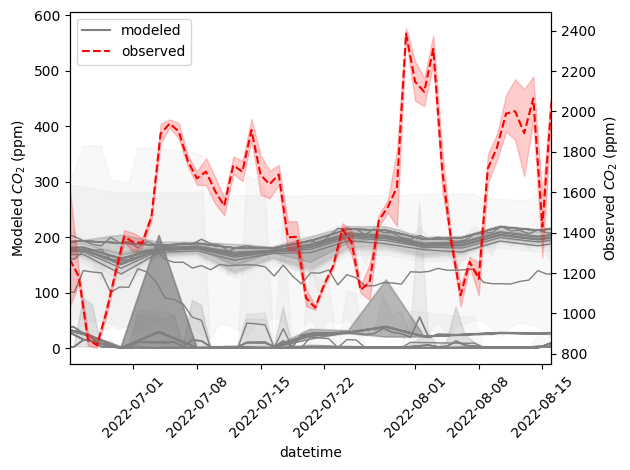

In [13]:
fig, ax1=plt.subplots()
burned_co2_df=burned_co2_df.reset_index(drop=True)
#sns.lineplot(data= burned_co2_df, x='datetime', y='co2_water', hue = 'run_name', legend=False, errorbar=None)
sns.lineplot(data= burned_co2_df, x='datetime', y='co2_water', legend=False, hue = 'run_name', errorbar=lambda x: (x.min(), x.max()), 
             palette = ['grey']*len(burned_co2_df['run_name'].unique()), linewidth=1, err_kws = {'alpha': 0.05}, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=burned_co2_obs, x='Date', y='CO2_High_ppm', color='red', linestyle='--', ax=ax2)

plt.xlim(min_bu_co2_date, max_bu_co2_date)

plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Date')

ax1.set_ylabel('Modeled $CO_2$ (ppm)')
ax2.set_ylabel('Observed $CO_2$ (ppm)')

legend = plt.legend(handles=[line1, line2], loc='upper left')
plt.draw()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
fig.tight_layout()

plt.savefig('YKD-SA/figures/SA_CO2_burned.jpg', dpi=300)

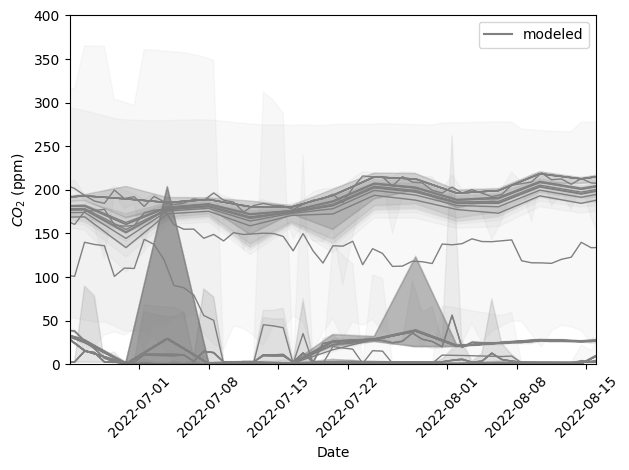

In [14]:
fig, ax=plt.subplots()
burned_co2_df=burned_co2_df.reset_index(drop=True)
#sns.lineplot(data= burned_co2_df, x='datetime', y='co2_water', hue = 'run_name', legend=False, errorbar=None)
sns.lineplot(data= burned_co2_df, x='datetime', y='co2_water', legend=False, hue = 'run_name', errorbar=lambda x: (x.min(), x.max()), 
             palette = ['grey']*len(burned_co2_df['run_name'].unique()), linewidth=1, err_kws = {'alpha': 0.05})
sns.lineplot(data=burned_co2_obs, x='Date', y='CO2_High_ppm', color='red', linestyle='--')
plt.xlim(min_bu_co2_date, max_bu_co2_date)

plt.ylim(0,400)
plt.xticks(rotation = 45)

plt.ylabel('$CO_2$ (ppm)')
plt.xlabel('Date')
legend = plt.legend(handles=[line1], loc='upper right')
fig.tight_layout()

plt.savefig('YKD-SA/figures/SA_CO2_burned_reduced_y.jpg', dpi=300)

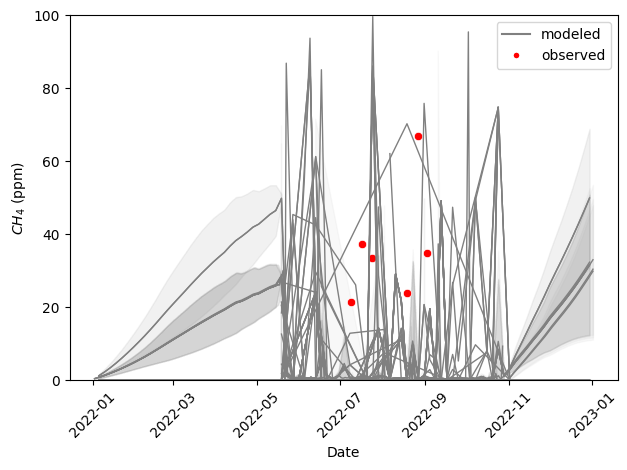

In [15]:
fig, ax=plt.subplots()
burned_ch4_df=burned_ch4_df.reset_index(drop=True)
sns.lineplot(data= burned_ch4_df[burned_ch4_df['ch4_water']<100], x='datetime', y='ch4_water', legend=False, hue = 'run_name', errorbar='sd', 
             palette = ['grey']*len(burned_ch4_df[burned_ch4_df['ch4_water']<100]['run_name'].unique()), linewidth=1, err_kws = {'alpha': 0.05})

#sns.scatterplot(data= burned_ch4_df[burned_ch4_df['ch4_water']<1500], x='datetime', y='ch4_water')
sns.scatterplot(data=ch4_obs[ch4_obs['sample']=='15B_FP'], x='date', y='CH4_ppm', label='observed', color='red')
#plt.xlim(min_ch4_date, max_ch4_date)
plt.ylim(0,100)
plt.xticks(rotation = 45)
plt.ylabel('$CH_4$ (ppm)')
plt.xlabel('Date')
legend = plt.legend(handles=[line1, red_dot], loc='upper right')
fig.tight_layout()

plt.savefig('YKD-SA/figures/SA_CH4_burned.jpg', dpi=300)

### Unburned Plots

In [16]:
sns.lineplot(data= unburned_vars_df[unburned_vars_df['t_water']!=-999], x='datetime', y='t_water', hue = 'run_name')
sns.lineplot(data=unburned_co2_obs, x='Date', y='WaterTemp_degC')

NameError: name 'unburned_vars_df' is not defined

In [ ]:
sns.lineplot(data= unburned_vars_df[unburned_vars_df['co2_water']!=-999], x='datetime', y='co2_water', hue = 'run_name')
sns.lineplot(data=unburned_co2_obs, x='Date', y='CO2_High_ppm')

In [ ]:
sns.lineplot(data= unburned_vars_df[unburned_vars_df['ch4_water']!=-999], x='datetime', y='ch4_water', hue = 'run_name')
sns.scatterplot(data=ch4_obs[ch4_obs['sample']=='UB_FP'], x='date', y='CH4_ppm', label='observed')